# Neural Network and Deep Learning

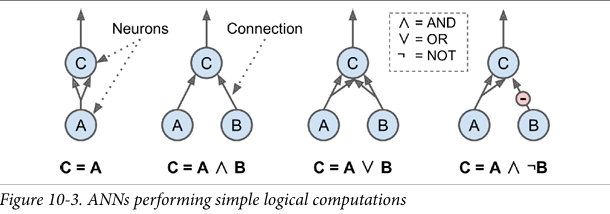

## The Perceptron 

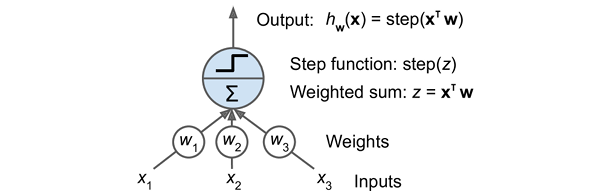

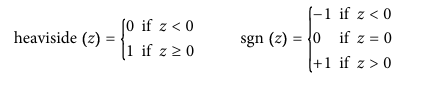

-- TLU (Threshold Logic Unit)(Esik Mantik Birimi)

-- LTU (Linear Threshold Unit)(Lineer Esik Birimi)

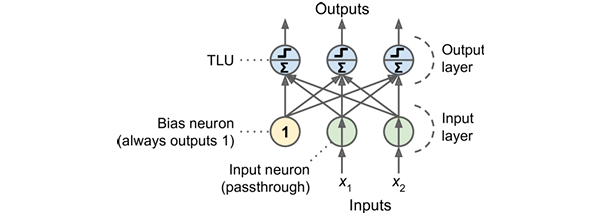



Bu denklemde: • Her zaman olduğu gibi, X giriş özellikleri matrisini temsil eder. Her örnek için bir satır ve her özellik için bir sütuna sahiptir. • Ağırlık matrisi W, bias nörondan gelenler hariç tüm bağlantı ağırlıklarını içerir. Her giriş nöronu için bir satır ve katmandaki her yapay nöron için bir sütuna sahiptir. • Bias vektörü b, bias nöron ile yapay nöronlar arasındaki tüm bağlantı ağırlıklarını içerir. Her yapay nöron için bir bias terimi vardır. • ϕ fonksiyonuna aktivasyon fonksiyonu denir: Yapay nöronlar TLU olduğunda, bu bir basamak fonksiyonudur (ama diğer aktivasyon fonksiyonlarını kısa süre sonra tartışacağız).

In [1]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris() 
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int64)

In [5]:
per_clf = Perceptron() 
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

### MLP 

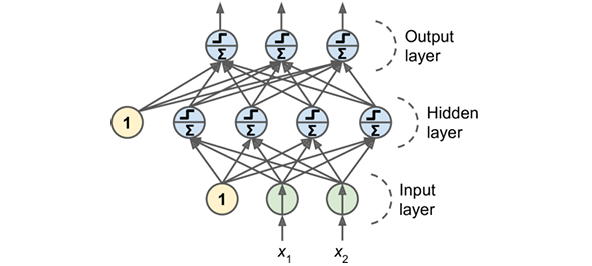

## Implementing MLPs with Keras! 

In [23]:
import tensorflow as tf 
from tensorflow import keras 

In [24]:
tf.__version__

'2.20.0'

In [25]:
keras.__version__

'3.11.3'

In [26]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [27]:
X_train_full.shape

(60000, 28, 28)

In [28]:
X_train_full.dtype

dtype('uint8')

In [29]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [30]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])


In [34]:
from tensorflow.keras.layers import Dense
output_layers = Dense(10)

In [35]:
from tensorflow import keras
output_layer = keras.layers.Dense(10)

In [36]:
model.summary() 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [38]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [41]:
model.get_layer('dense_3') is hidden1 

True

In [43]:
weight, biases = hidden1.get_weights() 
weight

array([[ 0.05730471,  0.02384782,  0.03831726, ..., -0.06867811,
        -0.06845345,  0.05445926],
       [-0.0591664 , -0.04595007,  0.0393746 , ...,  0.00512441,
         0.0692293 , -0.0730506 ],
       [-0.00972904,  0.03577539, -0.034851  , ..., -0.00393287,
        -0.02930984, -0.00773578],
       ...,
       [ 0.02636594, -0.03884688, -0.01933316, ...,  0.01533056,
         0.0730969 ,  0.03768457],
       [-0.07362889, -0.05425148, -0.05897042, ..., -0.03686256,
        -0.02580627,  0.02132869],
       [-0.01765966, -0.05480191,  0.01218081, ...,  0.06412762,
         0.04456601,  0.00679097]], shape=(784, 300), dtype=float32)

In [44]:
weight.shape

(784, 300)

In [45]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [46]:
biases.shape

(300,)

In [47]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs = 30,
    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8641 - loss: 0.3851 - val_accuracy: 0.8686 - val_loss: 0.3754
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8686 - loss: 0.3716 - val_accuracy: 0.8420 - val_loss: 0.4239
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8719 - loss: 0.3589 - val_accuracy: 0.8736 - val_loss: 0.3648
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8759 - loss: 0.3477 - val_accuracy: 0.8722 - val_loss: 0.3650
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8796 - loss: 0.3383 - val_accuracy: 0.8750 - val_loss: 0.3574
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8828 - loss: 0.3299 - val_accuracy: 0.8762 - val_loss: 0.3435
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8849 - loss: 0.3221 - val_accuracy: 0.8822 - val_loss: 0.3345
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8883 - loss: 0.3152 - 

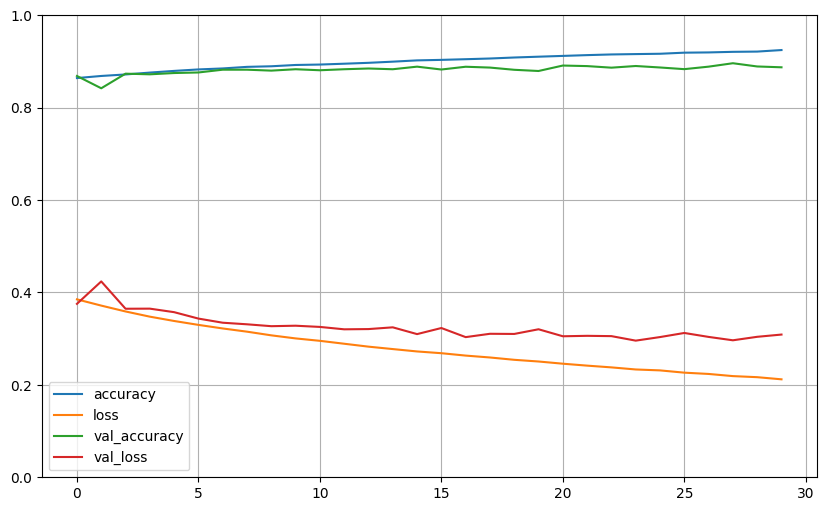

In [50]:
import pandas as pd 
import matplotlib.pyplot as plt 

pd.DataFrame(history.history).plot(figsize = (10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show() 

In [51]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8352 - loss: 73.1682


[73.16817474365234, 0.8352000117301941]

In [52]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [55]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP Using the Sequential API

In [56]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

C:\Users\Mustafa Baki\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  lora_alpha=None,


In [59]:
model.compile(loss = "mean_squared_error",
              optimizer = "sgd")

In [60]:
history = model.fit(X_train,
                    y_train,
                    epochs = 20,
                    validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8189 - val_loss: 0.7366
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5867 - val_loss: 0.5505
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5291 - val_loss: 0.4923
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5109 - val_loss: 0.4968
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4675 - val_loss: 0.5241
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4595 - val_loss: 0.4590
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4431 - val_loss: 0.4521
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4384 - val_loss: 0.4428
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4315 - val_loss: 0.4385
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4319 - val_loss: 0.4341
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4258 - val_loss: 0.4335
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [61]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 0.3761
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


###  Building Complex Models Using the Functional API
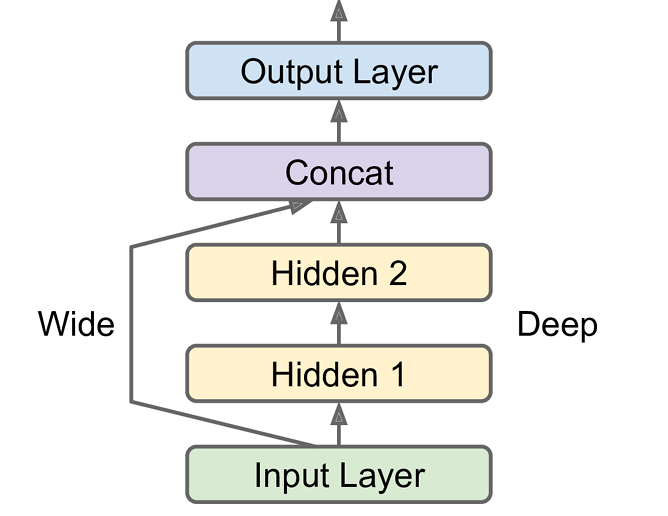

In [63]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs = [output])

In [65]:
# altta verilen yapiyi kodluyoruz. 
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs = [input_A, input_B], outputs = [output])

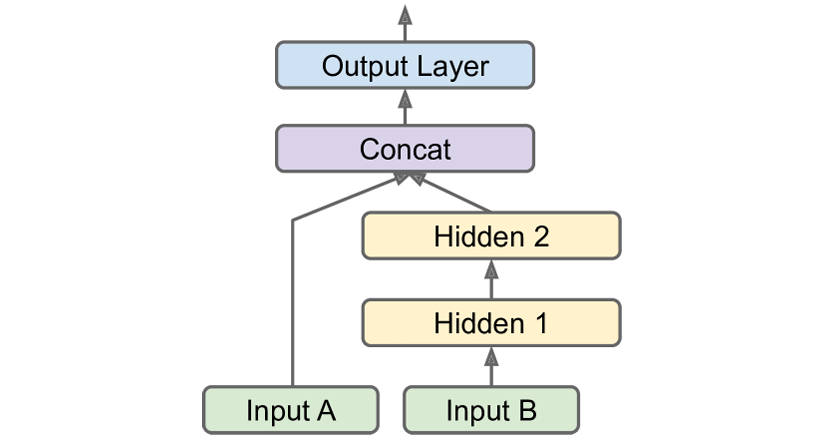

In [73]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate =1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [74]:
history = model.fit((X_train_A, X_train_B), y_train, epochs = 20, validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7454 - val_loss: 0.8936
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8236 - val_loss: 0.7559
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7320 - val_loss: 0.7010
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6872 - val_loss: 0.6687
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6574 - val_loss: 0.6439
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6346 - val_loss: 0.6248
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6161 - val_loss: 0.6095
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6004 - val_loss: 0.5961
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5870 - val_loss: 0.5843
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5759 - val_loss: 0.5746
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5661 - val_loss: 0.5662
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [75]:
output = keras.layers.Dense(1, name = "main_output")(concat)
aux_output = keras.layers.Dense(1, name = "aux_output")(hidden2)
model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

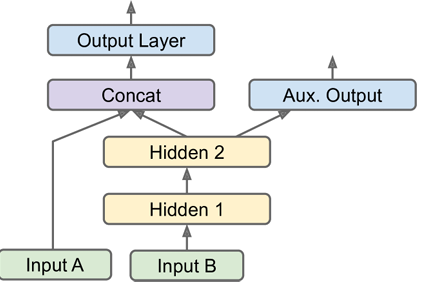

In [76]:
model.compile(loss = ["mse", "mse"], loss_weights = [0.9, 0.1], optimizer = "sgd")

In [77]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs = 20, validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 1.8678 - loss: 0.7963 - main_output_loss: 0.6771 - val_aux_output_loss: 1.0806 - val_loss: 0.5709 - val_main_output_loss: 0.5144
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 1.0046 - loss: 0.5711 - main_output_loss: 0.5232 - val_aux_output_loss: 0.9527 - val_loss: 0.5419 - val_main_output_loss: 0.4964
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - aux_output_loss: 0.8792 - loss: 0.5306 - main_output_loss: 0.4918 - val_aux_output_loss: 0.8162 - val_loss: 0.5128 - val_main_output_loss: 0.4792
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - aux_output_loss: 0.7868 - loss: 0.5091 - main_output_loss: 0.4782 - val_aux_output_loss: 0.7523 - val_loss: 0.4974 - val_main_output_loss: 0.4692
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.7419 - loss: 0.4909 - main_output_loss: 0.4630 - val_aux_output_loss: 0.7173 - val_loss: 0.4853 - val_main_output_loss: 0.4597


In [78]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - aux_output_loss: 0.4958 - loss: 0.3622 - main_output_loss: 0.3466


In [79]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


####  Using the Subclassing API to Build Dynamic Models


In [80]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units = 30, activation = "relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs): 
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 - self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

In [81]:
model.save("my_keras_models.h5")

In [85]:
class PrintValTrainRatioCallBack(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))


#### Using TensorBoard for Visualization